<a href="https://colab.research.google.com/github/ptk18/Machine-Learning/blob/main/65011466_ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Experiment 1: PyTorch Installation**

In [ ]:
import torch

rand = torch.rand(3,4)
print(rand)

data1 = [[1,2], [3,4]]
data2 = [[1], [2]]
data3 = [1,2]
t1 = torch.tensor(data1)
t2 = torch.tensor(data2)
t3 = torch.tensor(data3)
r1 = torch.matmul(t1, t2)
r2 = torch.matmul(t1, t3)
print("matrix A =", t1)
print("vector x =", t2)
print("transpose of x =", t3)
print("A * x =")
print(r1)
print("xT * A =")
print(r2)

tensor([[0.9876, 0.9706, 0.3429, 0.1988],
        [0.7574, 0.6270, 0.4530, 0.4009],
        [0.8268, 0.2209, 0.5768, 0.4402]])
matrix A = tensor([[1, 2],
        [3, 4]])
vector x = tensor([[1],
        [2]])
transpose of x = tensor([1, 2])
A * x =
tensor([[ 5],
        [11]])
xT * A =
tensor([ 5, 11])


## **Experiment 2 : ANN for Iris dataset using PyTorch**

In [ ]:
import pandas as pd
import numpy as np

filename = 'iris.csv'
df = pd.read_csv(filename)

X = df.drop('variety', axis=1)
X = X.values

y = df['variety']
y = y.values.reshape(150,1)

l_y = []
for i in range(len(y)):
  if y[i,0] == 'Setosa':
    l_y.append([1,0,0])
  elif y[i,0] == 'Versicolor':
    l_y.append([0,1,0])
  elif y[i,0] == 'Virginica':
    l_y.append([0,0,1])
y = np.array(l_y)

import torch
X = torch.Tensor(X)
y = torch.Tensor(y)
print(X)
print(y)
print(X.shape)
print(y.shape)

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

train_ds = TensorDataset(X_train, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
import torch
from torch import nn

class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer_out = nn.Linear(hidden_size, output_size)
    self.activation_fn = nn.Sigmoid()

  def forward(self, x):
    z1 = self.layer1(x)
    a1 = self.activation_fn(z1)
    z_out = self.layer_out(a1)
    y = nn.Softmax(dim=1)(z_out)
    return y

model_iris = MLP(4,8,3)
print(model_iris)

MLP(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer_out): Linear(in_features=8, out_features=3, bias=True)
  (activation_fn): Sigmoid()
)


In [ ]:
from torch.optim import SGD

learning_rate = 0.002
momentum = 0.1

loss_fn = nn.MSELoss(reduction='mean')

optimizer = SGD(model_iris.parameters(), lr=learning_rate, momentum=momentum)

num_epochs = 1000
batch_size = 1

loss_arr = []
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    predict = model_iris(x_batch)
    loss = loss_fn(predict, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % (num_epochs/10) == 0:
    print(f'Epch {epoch} Loss {loss.item():.4f}')
  loss_arr.append(loss.item())

Epch 0 Loss 0.1587
Epch 100 Loss 0.2068
Epch 200 Loss 0.1697
Epch 300 Loss 0.2023
Epch 400 Loss 0.1136
Epch 500 Loss 0.0319
Epch 600 Loss 0.1023
Epch 700 Loss 0.0152
Epch 800 Loss 0.0166
Epch 900 Loss 0.0067


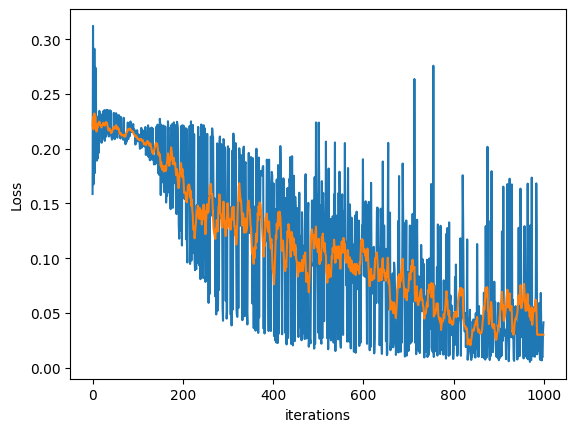

In [ ]:
import matplotlib.pyplot as plt

def wma(data, window_size):
  weights = np.arange(1, window_size + 1)
  return list(np.convolve(data, weights, mode='valid') / weights.sum())
loss_avg_arr = []
window_size = 15
loss_avg_arr = wma(loss_arr, window_size)
for i in range(window_size - 1):
  loss_avg_arr.append(loss_avg_arr[-1])
plt.plot(list(range(num_epochs)), loss_arr)
plt.plot(list(range(num_epochs)), loss_avg_arr)
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()

In [ ]:
correct = 0
total = y_test.shape[0]
y_predict = model_iris.forward(X_test)
for i in range(total):
  val_predict, indices_predict = torch.max(y_predict[i, :], 0)
  val_actual, indices_actual = torch.max(y_test[i, :],0)
  if indices_predict == indices_actual:
    correct += 1
print("number of correction=", correct, "out of ", total, ", accuracy=", correct/total)

number of correction= 30 out of  30 , accuracy= 1.0


In [ ]:
path = 'model_iris.pth'
torch.save(model_iris, path)

# **Experiment 3 : ANN for MNIST handwritten digit using PyTorch**

In [ ]:
#Load and Preprocess the MNIST Data

import torch
import torchvision
import torchvision.transforms as transforms

# Load the MNIST dataset using torchvision
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # Flattening the images from 28x28 into a single dimension (784)
        self.fc1 = nn.Linear(28*28, 100)  # First hidden layer with 100 neurons
        self.fc2 = nn.Linear(100, 100)    # Second hidden layer with 100 neurons
        self.fc3 = nn.Linear(100, 10)     # Output layer with 10 neurons (for digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input from [batch_size, 1, 28, 28] to [batch_size, 784]
        x = torch.relu(self.fc1(x))  # First hidden layer with ReLU activation
        x = torch.relu(self.fc2(x))  # Second hidden layer with ReLU activation
        x = self.fc3(x)  # Output layer (logits for classification)
        return x

# Instantiate the model
model = ANN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
# Training the Model

n_epochs = 5

for epoch in range(n_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/5, Loss: 0.9999538125641056
Epoch 2/5, Loss: 0.3785259581959324
Epoch 3/5, Loss: 0.321302690771597
Epoch 4/5, Loss: 0.2895437557893648
Epoch 5/5, Loss: 0.26426652489281666


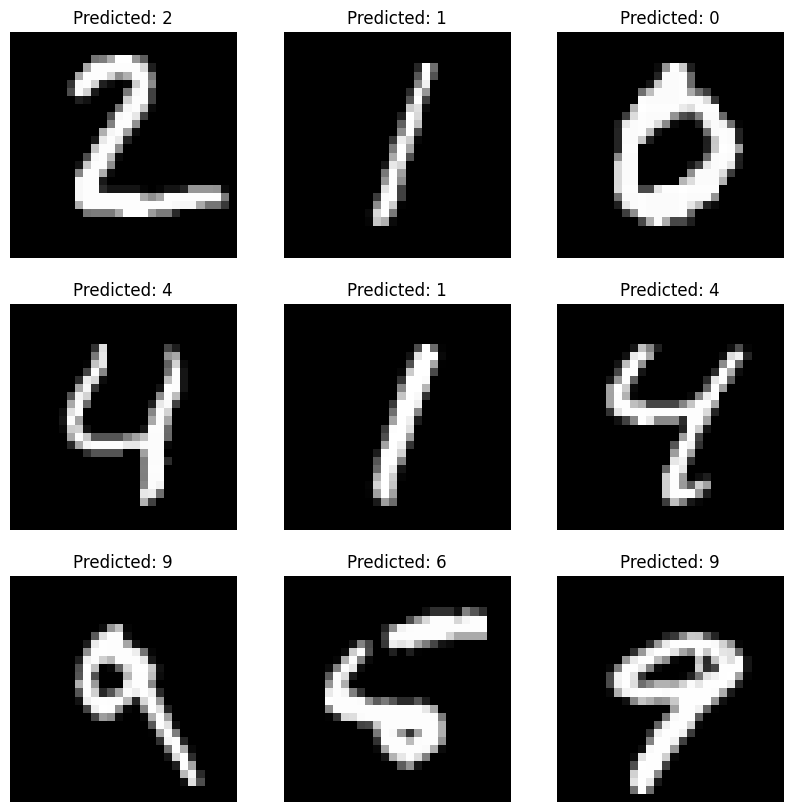

In [ ]:
#Visualizing the Results

import matplotlib.pyplot as plt

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot the images along with predicted labels
fig = plt.figure(figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.axis('off')
    plt.imshow(images[i].view(28, 28).numpy().squeeze(), cmap='gray')
    plt.title(f'Predicted: {predicted[i].item()}')
plt.show()


## **Experiment 4 : ONNX Installation**

In [ ]:
!pip install onnx
!pip install onnxscript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 8.3 MB/s eta 0:00:00


In [ ]:
import torch

# Load the pre-trained model
loaded_model = torch.load('model_iris.pth')

# Set the model to evaluation mode
loaded_model.eval()

<ipython-input-20-de83ea74dbc9>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('model_iris.pth')


MLP(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer_out): Linear(in_features=8, out_features=3, bias=True)
  (activation_fn): Sigmoid()
)

In [ ]:
import torch.nn as nn

class IrisModel(nn.Module):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 4 inputs for the iris dataset features
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)  # 3 output classes (for the 3 iris species)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
loaded_model = IrisModel()

# Set the model to evaluation mode
loaded_model.eval()


IrisModel(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)

In [ ]:
import torch
input_size_iris = 4 # input for iris model
dummy_input = torch.rand(1, input_size_iris)
input_names = ["input"]
output_names = ["output"]
torch.onnx.export(loaded_model, dummy_input, "model_iris.onnx", verbose=False, input_names=input_names, output_names=output_names, export_params=True,)


In [ ]:
onnx_program.save("my_image_classifier.onnx")

In [ ]:
import onnx
onnx_model = onnx.load("my_image_classifier.onnx")
onnx.checker.check_model(onnx_model)
